In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [3]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [8]:
y_n = {
    "Yes": True,
    "No": False
}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(y_n)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(y_n)

In [9]:
print(star_wars.head(10))

    RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1   3.292880e+09                                               True             
2   3.292880e+09                                              False             
3   3.292765e+09                                               True             
4   3.292763e+09                                               True             
5   3.292731e+09                                               True             
6   3.292719e+09                                               True             
7   3.292685e+09                                               True             
8   3.292664e+09                                               True             
9   3.292654e+09                                               True             
10  3.292640e+09                                               True             

   Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                               

In [24]:
seen = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(seen)

In [27]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

In [30]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': "rank_1",
    "Unnamed: 10": "rank_2",
    "Unnamed: 11": "rank_3",
    "Unnamed: 12": "rank_4",
    "Unnamed: 13": "rank_5",
    "Unnamed: 14": "rank_6"
})

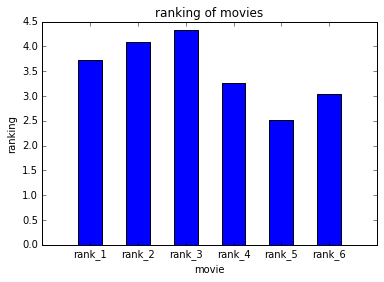

In [36]:
ave_rank = star_wars[star_wars.columns[9:15]].mean()
rk_left = np.arange(6)+0.75
rk_xpos = np.arange(6)+1
rk_height = ave_rank.values.tolist()
rk_label = star_wars.columns[9:15].tolist()
fig, ax = plt.subplots()
ax.bar(rk_left, rk_height, width = 0.5)
ax.set_xlabel("movie")
ax.set_ylabel("ranking")
ax.set_xticks(rk_xpos)
ax.set_xticklabels(rk_label)
ax.set_title("ranking of movies")
plt.show()

The Empire Strikes Back has the best ranking. The earlier the movie is, the better people tend to rank it.

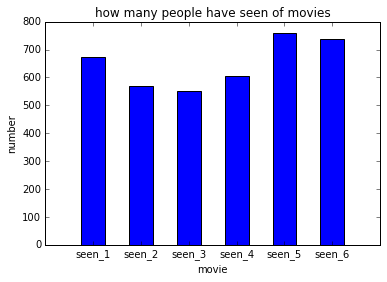

In [40]:
sum_seen = star_wars[star_wars.columns[3:9]].sum()
sm_left = np.arange(6)+0.75
sm_xpos = np.arange(6)+1
sm_height = sum_seen.values.tolist()
sm_label = star_wars.columns[3:9].tolist()
fig, ax = plt.subplots()
ax.bar(sm_left, sm_height, width = 0.5)
ax.set_xlabel("movie")
ax.set_ylabel("number")
ax.set_xticks(sm_xpos)
ax.set_xticklabels(sm_label)
ax.set_title("how many people have seen of movies")
plt.show()

The number of viewers seems to decrease over time since The Empire Strikes Back.
The more number of viewers, the better the movie is ranked.
People would only rank the movie they have seen. If one has only seen a few movie, these movie will have lower rank number.

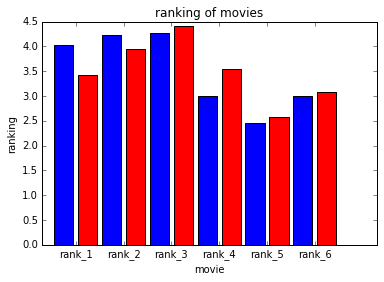

In [46]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
ave_rank_m = males[star_wars.columns[9:15]].mean()
ave_rank_f = females[star_wars.columns[9:15]].mean()
rk_left_m = np.arange(6)+0.25
rk_left_f = np.arange(6)+0.75
rk_xpos = np.arange(6)+0.7
rk_height_m = ave_rank_m.values.tolist()
rk_height_f = ave_rank_f.values.tolist()
rk_label = star_wars.columns[9:15].tolist()
fig, ax = plt.subplots()
ax.bar(rk_left_m, rk_height_m, width = 0.4, color="blue")
ax.bar(rk_left_f, rk_height_f, width = 0.4, color="red")
ax.set_xlabel("movie")
ax.set_ylabel("ranking")
ax.set_xticks(rk_xpos)
ax.set_xticklabels(rk_label)
ax.set_title("ranking of movies")
plt.show()

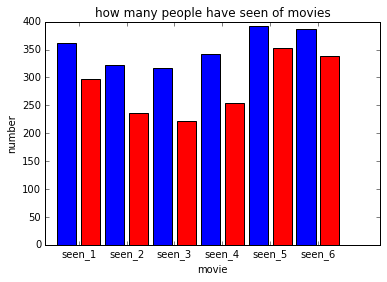

In [48]:
sum_seen_m = males[star_wars.columns[3:9]].sum()
sum_seen_f = females[star_wars.columns[3:9]].sum()
sm_left_m = np.arange(6)+0.25
sm_left_f = np.arange(6)+0.75
sm_xpos = np.arange(6)+0.7
sm_height_m = sum_seen_m.values.tolist()
sm_height_f = sum_seen_f.values.tolist()
sm_label = star_wars.columns[3:9].tolist()
fig, ax = plt.subplots()
ax.bar(sm_left_m, sm_height_m, width = 0.4, color="blue")
ax.bar(sm_left_f, sm_height_f, width = 0.4, color="red")
ax.set_xlabel("movie")
ax.set_ylabel("number")
ax.set_xticks(sm_xpos)
ax.set_xticklabels(sm_label)
ax.set_title("how many people have seen of movies")
plt.show()

More men than women have seen the movies of Star Wars.
The ranking from men and women are similar, except women prefer episode 3 to episode 1.